# Spectral Feature Extraction


In [0]:
# !sudo apt-get install -qq python python-dev python-pip build-essential swig libpulse-dev
# !sudo pip install pocketsphinx

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip drive/My\ Drive/emotion

In [0]:
# !pip install --upgrade "ibm-watson>=4.0.1"
# !pip install SpeechRecognition


In [0]:
import os

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import pandas as pd

In [0]:
classes = os.listdir('meld/train/')

In [9]:
classes

['neutral', 'happy', 'disgust', 'sad', 'fear']

In [0]:
# !rm -rf train_mel_spectrogram_happy/
# !rm -rf train_mfcc_happy/
os.mkdir('train_mel_spectrogram_'+str(classes[1]))
os.mkdir('train_mfcc_'+str(classes[1]))

In [0]:
def get_mfcc(file, feature='mfcc'):
  
  # image file
  img = file.replace('.wav', '_mfcc.jpg')
  img = img.split('/')[-1]
  
  # mfcc features
  aud, sr = librosa.load(path=file, duration=6)
  mfcc = librosa.feature.mfcc(y=aud, sr=sr, n_mfcc=40)
  fig = librosa.display.specshow(mfcc, x_axis=None, y_axis=None)
  plt.box(on=False)
  plt.savefig('train_mel_spectrogram_happy/'+img,  pad_inches=0)
  return img

  
def get_mel(file, feature='mel_spec'):
  
  # image file
  img = file.replace('.wav', '_mel.jpg')
  img = img.split('/')[-1]
  
  # get the mel spectrogram
  aud, sr = librosa.load(path=file, duration=6)
  S = librosa.feature.melspectrogram(y=aud, sr=sr, n_mels=128, fmax=8000)
  S_dB = librosa.power_to_db(S, ref=np.max)
  fig = librosa.display.specshow(S_dB, x_axis=None,y_axis=None, sr=sr, fmax=8000)
  
  plt.box(on=False)
  plt.savefig('train_mfcc_happy/'+img,  pad_inches=0)
  
  return img

def get_rms(file, feature='rms'):
  aud, sr = librosa.load(path=file, duration=6)
  S, phase = librosa.magphase(librosa.stft(aud))
  rms = librosa.feature.rms(S=S)
  rms = rms.flatten()
  if rms.shape[0] < 128:
    rms = np.pad(rms, pad_width=128-rms.shape[0],mode='mean')
  elif rms.shape[0] > 128:
    rms = rms[:128]
  return rms

In [0]:
features_train_happy = {}


In [0]:
np.random.seed(42)

#DataFlair - Load the data and extract features for each sound file

def load_data(path, cls=classes[1]):
    
  
    files = np.array(os.listdir(path))
    # downsampling we will take only less than 500 data points
    if files.shape[0] > 700:
      files = files[:700]
      
    i = 0
      
    for file in files:
      data = {}
      
      file_path = path+'/'+file
      mfcc = get_mfcc(str(file_path))
      mel = get_mel(str(file_path))
      rms = get_rms(str(file_path))
      
      data['emotion']=cls
      data['mfcc']=mfcc
      data['mel']=mel
      data['rms']=rms
      
      features_train_happy[file] = data

      
      if i%50==0:
        print('%d of class '%i+cls+" have been processed")
      i+=1
            
    return features_train_happy

0 of class happy have been processed
50 of class happy have been processed
100 of class happy have been processed
150 of class happy have been processed
200 of class happy have been processed
250 of class happy have been processed
300 of class happy have been processed
350 of class happy have been processed
400 of class happy have been processed
450 of class happy have been processed
500 of class happy have been processed
550 of class happy have been processed
600 of class happy have been processed
650 of class happy have been processed


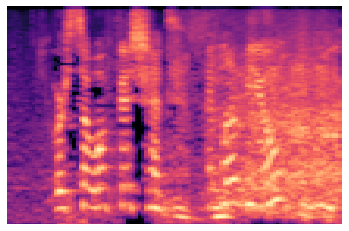

In [32]:
features = load_data('meld/train/happy/')

In [33]:
len(features_train_happy)

700

In [34]:
!zip -r train_mel_spectrogram_happy.zip train_mel_spectrogram_happy/

  adding: train_mel_spectrogram_happy/ (stored 0%)
  adding: train_mel_spectrogram_happy/MEL_dia541_utt8_positive_HAP_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_happy/MEL_dia652_utt10_positive_HAP_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_happy/MEL_dia792_utt0_positive_HAP_mfcc.jpg (deflated 8%)
  adding: train_mel_spectrogram_happy/MEL_dia480_utt0_positive_HAP_mfcc.jpg (deflated 7%)
  adding: train_mel_spectrogram_happy/MEL_dia115_utt0_positive_HAP_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_happy/MEL_dia440_utt2_positive_HAP_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_happy/MEL_dia517_utt6_positive_HAP_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_happy/MEL_dia610_utt7_positive_HAP_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_happy/MEL_dia241_utt1_negative_HAP_mfcc.jpg (deflated 10%)
  adding: train_mel_spectrogram_happy/MEL_dia258_utt9_positive_HAP_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_happy/MEL_dia81

In [35]:
!zip -r train_mfcc_happy.zip train_mfcc_happy/

  adding: train_mfcc_happy/ (stored 0%)
  adding: train_mfcc_happy/MEL_dia811_utt5_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia913_utt11_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia501_utt3_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia926_utt13_positive_HAP_mel.jpg (deflated 4%)
  adding: train_mfcc_happy/MEL_dia557_utt6_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia445_utt8_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia636_utt5_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia929_utt0_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia555_utt1_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia313_utt3_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia629_utt4_positive_HAP_mel.jpg (deflated 2%)
  adding: train_mfcc_happy/MEL_dia830_utt5_positive_HAP_mel.jpg (deflated 3%)
  adding: train_mfcc_h

In [37]:
print(len(os.listdir('train_mel_spectrogram_happy/')), len(os.listdir('train_mfcc_happy/')))

700 700


In [0]:
import pickle

In [0]:
with open('spectral_features_train_happy.pkl', 'wb') as fp:
  pickle.dump(features_train_happy, fp)

# Text Feature Extraction

In [0]:
# to play the sound
import IPython.display as ipd

In [0]:
# !sudo apt-get install -qq python python-dev python-pip build-essential swig libpulse-dev
# !sudo pip install pocketsphinx

In [0]:
# !pip install SpeechRecognition
import speech_recognition as sr

In [0]:
r = sr.Recognizer()

In [47]:
file = 'meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav'
file_audio = sr.AudioFile(file)
ipd.Audio(file)

In [0]:
with file_audio as source:
  audio = r.record(source)

In [49]:
r.recognize_sphinx(audio)

'would you look at the dock at at at hit a'

In [51]:
?!pip install --upgrade "ibm-watson>=4.0.1"

Object `` not found.


In [0]:
import json
from os.path import join, dirname
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [0]:
authenticator = IAMAuthenticator('IUsZZBiWve_v7Jd0fGezFwNzODFnNKhZZ9FdhY-GPnZR')
speech_to_text = SpeechToTextV1(authenticator=authenticator)

speech_to_text.set_service_url('https://gateway-lon.watsonplatform.net/speech-to-text/api')


with open('meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav', 'rb') as audio_file:
    speech_recognition_results = speech_to_text.recognize(audio=audio_file, content_type='audio/wav',word_alternatives_threshold=0.9, timestamps=False).get_result()


In [54]:
speech_recognition_results['results'][0]['alternatives'][0]['transcript']

'would you look at this and don '

In [0]:
def extract_text_feature(file):
  text = ''
  file_audio = sr.AudioFile(file)
  with file_audio as source:
    audio = r.record(source)
    
  try:
    text = r.recognize_google(audio)
  except Exception:
    with open(file, 'rb') as audio_file:
      speech_recognition_results = speech_to_text.recognize(audio=audio_file, content_type='audio/wav',word_alternatives_threshold=0.9, timestamps=False).get_result()
      if len(speech_recognition_results['results']) > 0:
        text = speech_recognition_results['results'][0]['alternatives'][0]['transcript']
  except Exception:
    text = r.recognize_sphinx(audio) 
  except:
    text = 'no text recognized'
 
  return text

In [0]:
classes = os.listdir('meld/train/')

In [62]:
classes

['neutral', 'happy', 'disgust', 'sad', 'fear']

In [63]:
classes[2]

'disgust'

In [0]:
train_text_feature_disgust = {}

In [73]:
# classes[0], classes[1], classes[3] have been extracted from other notebook
classes[4]

'fear'

In [0]:
train_text_feature_fear = {}

In [0]:
#DataFlair - Load the data and extract features for each sound file

def load_data(path, cls=classes[4]):
    
  
    files = np.array(os.listdir(path))
    # downsampling we will take only less than 700 data points
    if files.shape[0] > 700:
      files = files[:700]
      
    i = 0
      
    for file in files:
      data = {}
      
      file_path = path+'/'+file
      
      text = extract_text_feature(file_path)
      
      data['text']=text
      data['emotion']=cls
      
      train_text_feature_fear[file] = data

      
      if i%50==0:
        print('%d of class '%i+cls+" have been processed")
      i+=1
            
    return train_text_feature_fear

In [76]:
features = load_data('meld/train/fear/')

0 of class fear have been processed
50 of class fear have been processed
100 of class fear have been processed
150 of class fear have been processed
200 of class fear have been processed


In [77]:
classes[4]

'fear'

In [78]:
train_text_feature_fear

{'MEL_dia1016_utt11_negative_FEA.wav': {'emotion': 'fear',
  'text': "we ran out of gas and we don't know where we are so we can't get a tote"},
 'MEL_dia1018_utt1_negative_FEA.wav': {'emotion': 'fear',
  'text': '%HESITATION girls '},
 'MEL_dia1018_utt7_negative_FEA.wav': {'emotion': 'fear',
  'text': "right I promise I'll fix this I swear I'll I'll I'll talk to her "},
 'MEL_dia1025_utt11_negative_FEA.wav': {'emotion': 'fear',
  'text': "is the only desert and if I screwed up everybody's going to be like over never that Thanksgiving When Rachel screwed up that rifle"},
 'MEL_dia130_utt11_negative_FEA.wav': {'emotion': 'fear',
  'text': 'you think maybe we should invite her'},
 'MEL_dia133_utt15_negative_FEA.wav': {'emotion': 'fear',
  'text': "I can't stay here all night"},
 'MEL_dia143_utt5_negative_FEA.wav': {'emotion': 'fear',
  'text': 'are you going to break up with me if I get fat again'},
 'MEL_dia148_utt15_negative_FEA.wav': {'emotion': 'fear',
  'text': 'you tell me if you w

In [79]:
len(train_text_feature_fear)

216

In [0]:
import pickle

In [0]:
with open('train_text_feature_fear.pkl', 'wb') as fp:
  pickle.dump(train_text_feature_fear, fp)